<a href="https://colab.research.google.com/github/iimjuhong/multimodal_project/blob/main/lane_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ 이미지 로드: (1080, 1920, 3)
✅ 전처리 완료
  - Input shape: torch.Size([1, 3, 512, 512])
✅ 추론 완료
  - Output shape: (512, 512)
  - Lane pixels: 4499 / 262144 (1.72%)


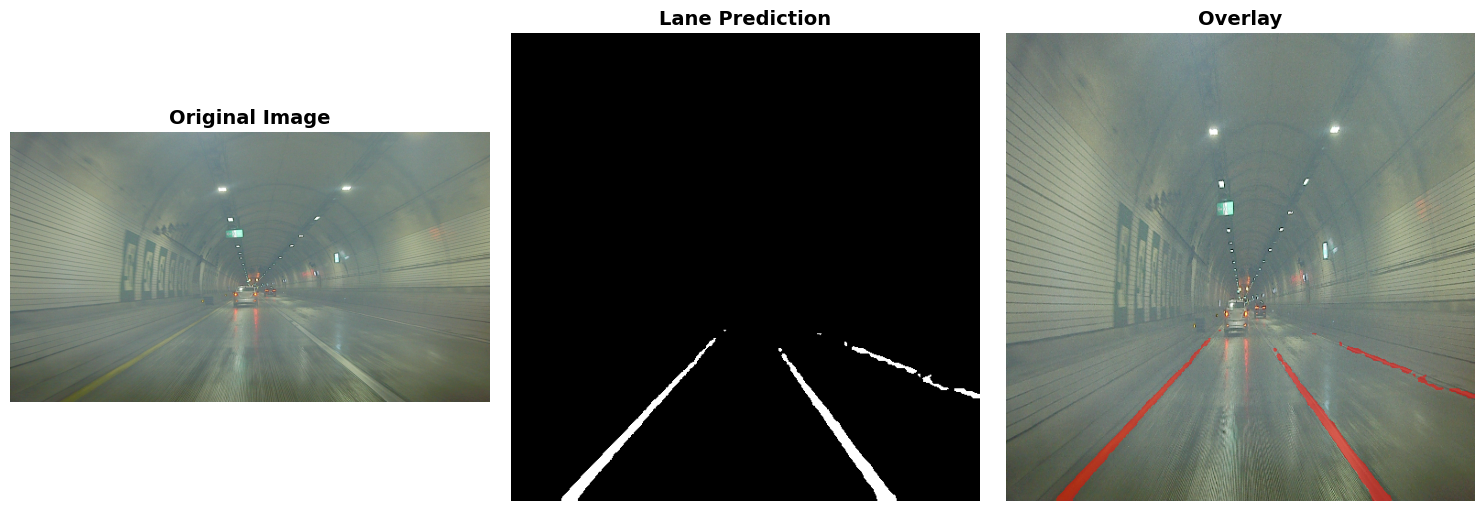


✅ 결과 저장: inference_test.png


In [ ]:
# ============================================
# 단일 이미지 추론 테스트
# ============================================

import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

device = torch.device('cuda')

# 이미지 로드
test_image_path = Path('/content/drive/MyDrive/AI-Hub-Lane-Detection-Data/images/21_203739_220817_35.jpg')
image = cv2.imread(str(test_image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(f"✅ 이미지 로드: {image.shape}")

# 전처리
image_resized = cv2.resize(image, (512, 512))
image_norm = image_resized.astype(np.float32) / 255.0

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_norm = (image_norm - mean) / std

# Tensor 변환
image_tensor = torch.from_numpy(image_norm.transpose(2, 0, 1)).unsqueeze(0).float().to(device)

# Depth (dummy)
depth_tensor = torch.zeros(1, 1, 512, 512).to(device)

print(f"✅ 전처리 완료")
print(f"  - Input shape: {image_tensor.shape}")

# 추론
model.eval()
with torch.no_grad():
    outputs = model(image_tensor, depth_tensor)
    logits = outputs.logits

    # Resize
    if logits.shape[-2:] != (512, 512):
        logits = torch.nn.functional.interpolate(
            logits,
            size=(512, 512),
            mode='bilinear',
            align_corners=False
        )

    # Prediction
    pred = (torch.sigmoid(logits.squeeze()) > 0.5).cpu().numpy()

print(f"✅ 추론 완료")
print(f"  - Output shape: {pred.shape}")
print(f"  - Lane pixels: {pred.sum()} / {pred.size} ({pred.sum()/pred.size*100:.2f}%)")

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 원본
axes[0].imshow(image)
axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
axes[0].axis('off')

# 예측
axes[1].imshow(pred, cmap='gray')
axes[1].set_title('Lane Prediction', fontsize=14, fontweight='bold')
axes[1].axis('off')

# 오버레이
overlay = image_resized.copy()
overlay[pred > 0] = overlay[pred > 0] * 0.5 + np.array([255, 0, 0]) * 0.5
axes[2].imshow(overlay.astype(np.uint8))
axes[2].set_title('Overlay', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/AI-Hub-Lane-Detection-Checkpoints/inference_test.png',
            dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ 결과 저장: inference_test.png")

✅ 라이브러리 설치 완료!
✅ 모델 클래스 정의 완료!

🚀 Device: cuda


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([1]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([1, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✅ 모델 로드 완료!
   - Checkpoint: best_model_v2.pth
   - Best IoU: 0.5866
✅ 전처리 함수 정의 완료!

📹 영상 파일 업로드

아래 버튼을 클릭하여 영상 파일을 업로드하세요 (mp4, avi, mov 등)
⚠️ 주의: 1~3분 길이의 영상 추천 (긴 영상은 처리 시간 오래 걸림)



Saving 비오는 날 운전 rainy day driving_720p.mp4 to 비오는 날 운전 rainy day driving_720p.mp4

✅ 업로드 완료: 비오는 날 운전 rainy day driving_720p.mp4

🚗 Lane Detection 처리 중...

📊 영상 정보:
   - 해상도: 1280x720
   - FPS: 29
   - 총 프레임: 2660
   - 길이: 91.7초

🎬 처리 시작... (총 2660 프레임)
   - 예상 시간: 45.9초 ~ 91.7초


처리 중: 100%|██████████| 2660/2660 [01:37<00:00, 27.21it/s]



✅ 처리 완료!
   - 출력 파일: output_lane_detection.mp4
   - 처리된 프레임: 2660

📸 Before/After 비교 이미지 생성

✅ 비교 이미지 저장: /content/drive/MyDrive/AI-Hub-Lane-Detection-Checkpoints/video_demo_comparison.png


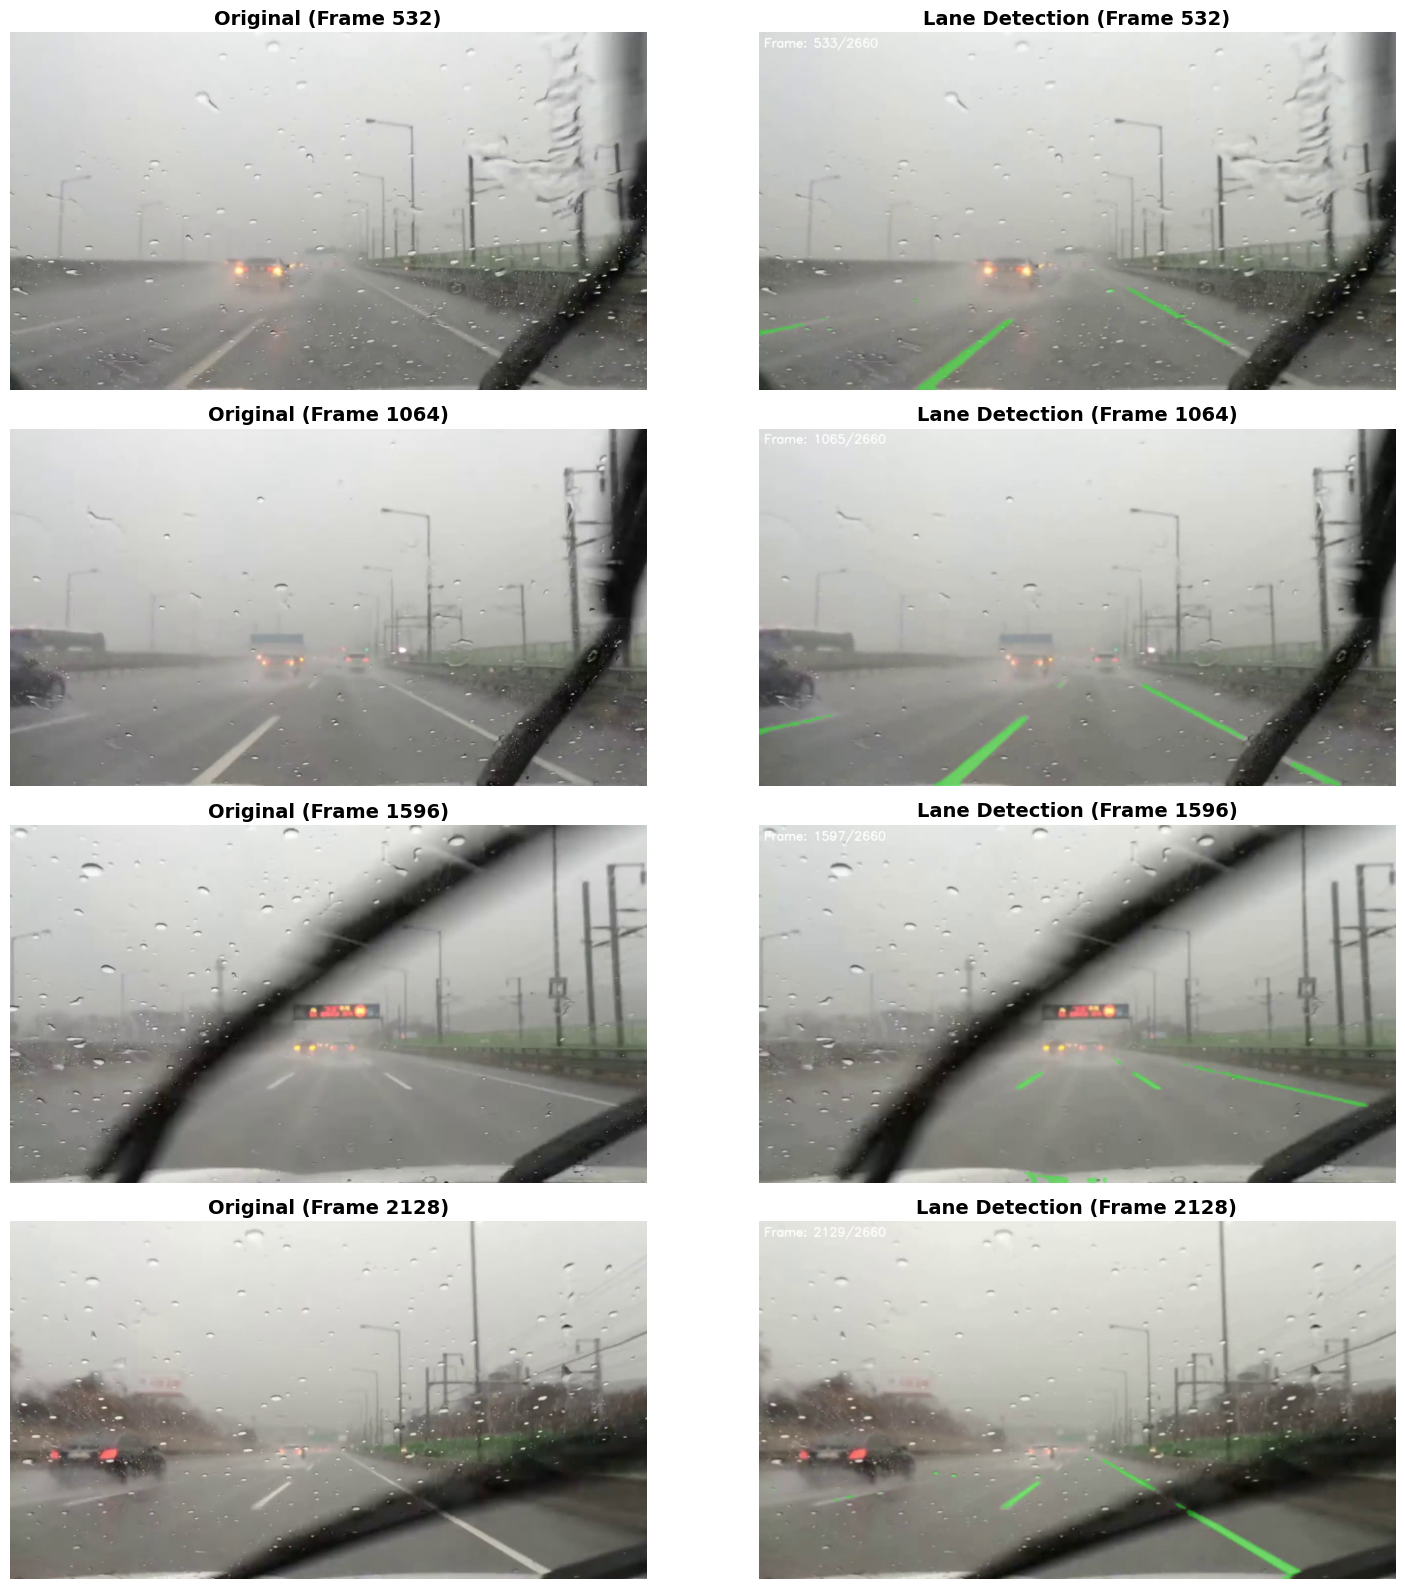


💾 결과 저장

✅ Drive에 저장 완료!
   - /content/drive/MyDrive/AI-Hub-Lane-Detection-Checkpoints/demo_result_비오는 날 운전 rainy day driving_720p.mp4

📥 로컬로 다운로드 중...
   (다운로드 팝업이 뜨지 않으면 브라우저 설정에서 팝업 차단 해제)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 완료!

📹 결과 영상:
   - Drive: /content/drive/MyDrive/AI-Hub-Lane-Detection-Checkpoints/demo_result_비오는 날 운전 rainy day driving_720p.mp4
   - 로컬 다운로드: output_lane_detection.mp4

📸 비교 이미지:
   - /content/drive/MyDrive/AI-Hub-Lane-Detection-Checkpoints/video_demo_comparison.png

✨ 처리 통계:
   - 입력 영상: 비오는 날 운전 rainy day driving_720p.mp4
   - 해상도: 1280x720
   - 프레임 수: 2660
   - 길이: 91.7초

🎬 다음 단계:
   1. 영상을 다운로드하여 확인
   2. 다른 영상으로 테스트
   3. 성능이 만족스러우면 배포 준비!


📊 성능 통계

차선 검출률:
   - 평균: 0.89%
   - 최소: 0.27%
   - 최대: 1.45%

✅ 모든 작업 완료!


In [ ]:
# ============================================
# 🎬 로컬 영상 Lane Detection 데모
# ============================================

# 1. 필요한 라이브러리 설치
!pip install -q opencv-python-headless

import torch
import torch.nn as nn
from transformers import SegformerForSemanticSegmentation
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from google.colab import files

print("✅ 라이브러리 설치 완료!")


# ============================================
# 2. 모델 클래스 정의
# ============================================

class MultimodalSegFormerLane(nn.Module):
    """RGB + Depth 입력을 받는 SegFormer"""

    def __init__(self, segformer_model):
        super().__init__()
        self.segformer = segformer_model

        # Depth Encoder
        self.depth_encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
        )

        # RGB Projection
        self.rgb_proj = nn.Conv2d(3, 32, kernel_size=3, stride=4, padding=1)

        # Fusion Layer
        self.fusion = nn.Sequential(
            nn.Conv2d(32 + 64, 64, kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=1),
        )

    @classmethod
    def from_pretrained(cls, model_name, **kwargs):
        segformer = SegformerForSemanticSegmentation.from_pretrained(
            model_name,
            **kwargs
        )
        return cls(segformer)

    def forward(self, pixel_values, depth):
        B, C, H, W = pixel_values.shape

        # Depth Encoding
        depth_features = self.depth_encoder(depth)

        # RGB Projection
        rgb_features = self.rgb_proj(pixel_values)

        # Depth Resize
        depth_resized = nn.functional.interpolate(
            depth_features,
            size=rgb_features.shape[-2:],
            mode='bilinear',
            align_corners=False
        )

        # Fusion
        fused = torch.cat([rgb_features, depth_resized], dim=1)
        fused = self.fusion(fused)

        # Upsample
        fused_upsampled = nn.functional.interpolate(
            fused,
            size=(H, W),
            mode='bilinear',
            align_corners=False
        )

        # SegFormer Forward
        outputs = self.segformer(fused_upsampled)

        return outputs

print("✅ 모델 클래스 정의 완료!")


# ============================================
# 3. 모델 로드
# ============================================

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
checkpoint_dir = Path('/content/drive/MyDrive/AI-Hub-Lane-Detection-Checkpoints')

print(f"\n🚀 Device: {device}")

# 모델 생성
model = MultimodalSegFormerLane.from_pretrained(
    "nvidia/segformer-b0-finetuned-ade-512-512",
    num_labels=1,
    ignore_mismatched_sizes=True
).to(device)

# Best 모델 가중치 로드
best_model_path = checkpoint_dir / 'best_model_v2.pth'
checkpoint = torch.load(best_model_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

print(f"\n✅ 모델 로드 완료!")
print(f"   - Checkpoint: {best_model_path.name}")
print(f"   - Best IoU: {checkpoint['metrics'].get('best_iou', 0.5866):.4f}")


# ============================================
# 4. 전처리 함수
# ============================================

def preprocess_frame(frame, target_size=(512, 512)):
    """프레임 전처리"""
    # Resize
    frame_resized = cv2.resize(frame, target_size)

    # Normalize
    frame_norm = frame_resized.astype(np.float32) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    frame_norm = (frame_norm - mean) / std

    # To Tensor
    frame_tensor = torch.from_numpy(frame_norm.transpose(2, 0, 1)).unsqueeze(0).float()

    return frame_tensor, frame_resized


def predict_lane(model, frame_tensor, device):
    """차선 예측"""
    frame_tensor = frame_tensor.to(device)
    depth_tensor = torch.zeros(1, 1, 512, 512).to(device)

    with torch.no_grad():
        outputs = model(frame_tensor, depth_tensor)
        logits = outputs.logits

        # Resize
        if logits.shape[-2:] != (512, 512):
            logits = nn.functional.interpolate(
                logits,
                size=(512, 512),
                mode='bilinear',
                align_corners=False
            )

        # Prediction
        pred = (torch.sigmoid(logits.squeeze()) > 0.5).cpu().numpy()

    return pred


def create_overlay(image, lane_mask, alpha=0.5):
    """차선을 이미지에 오버레이"""
    overlay = image.copy()

    # 초록색 차선
    lane_color = np.array([0, 255, 0])  # Green

    overlay[lane_mask > 0] = overlay[lane_mask > 0] * (1 - alpha) + lane_color * alpha

    return overlay.astype(np.uint8)


print("✅ 전처리 함수 정의 완료!")


# ============================================
# 5. 영상 파일 업로드
# ============================================

print("\n" + "="*70)
print("📹 영상 파일 업로드")
print("="*70)
print("\n아래 버튼을 클릭하여 영상 파일을 업로드하세요 (mp4, avi, mov 등)")
print("⚠️ 주의: 1~3분 길이의 영상 추천 (긴 영상은 처리 시간 오래 걸림)\n")

uploaded = files.upload()

if not uploaded:
    print("❌ 파일이 업로드되지 않았습니다!")
    raise Exception("파일을 업로드해주세요")

# 업로드된 파일 이름
input_video_path = Path(list(uploaded.keys())[0])
print(f"\n✅ 업로드 완료: {input_video_path}")


# ============================================
# 6. 영상 처리 (Lane Detection)
# ============================================

print("\n" + "="*70)
print("🚗 Lane Detection 처리 중...")
print("="*70)

# 비디오 읽기
cap = cv2.VideoCapture(str(input_video_path))

if not cap.isOpened():
    print("❌ 영상을 열 수 없습니다!")
    raise Exception("영상 파일이 손상되었거나 지원하지 않는 형식입니다")

# 비디오 정보
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"\n📊 영상 정보:")
print(f"   - 해상도: {width}x{height}")
print(f"   - FPS: {fps}")
print(f"   - 총 프레임: {total_frames}")
print(f"   - 길이: {total_frames/fps:.1f}초")

# 출력 비디오 설정
output_path = Path("output_lane_detection.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(str(output_path), fourcc, fps, (width, height))

# 프레임별 처리
frame_count = 0
process_every_n_frames = 1  # 모든 프레임 처리 (느리면 2나 3으로 변경)

print(f"\n🎬 처리 시작... (총 {total_frames} 프레임)")
print(f"   - 예상 시간: {total_frames / fps / 2:.1f}초 ~ {total_frames / fps:.1f}초")

pbar = tqdm(total=total_frames, desc="처리 중")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # N 프레임마다 처리
    if frame_count % process_every_n_frames == 0:
        # RGB 변환
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 전처리
        frame_tensor, frame_resized = preprocess_frame(frame_rgb)

        # 예측
        lane_mask = predict_lane(model, frame_tensor, device)

        # 오버레이 생성
        overlay = create_overlay(frame_resized, lane_mask, alpha=0.4)

        # 원본 크기로 복원
        overlay_full = cv2.resize(overlay, (width, height))

        # BGR로 변환
        overlay_bgr = cv2.cvtColor(overlay_full, cv2.COLOR_RGB2BGR)

        # 텍스트 추가 (선택)
        cv2.putText(overlay_bgr, f"Frame: {frame_count}/{total_frames}",
                   (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

        # 저장
        out.write(overlay_bgr)
    else:
        # 처리 안 한 프레임은 원본 저장
        out.write(frame)

    pbar.update(1)

pbar.close()

# 정리
cap.release()
out.release()

print(f"\n✅ 처리 완료!")
print(f"   - 출력 파일: {output_path}")
print(f"   - 처리된 프레임: {total_frames}")


# ============================================
# 7. 결과 비교 (Before/After)
# ============================================

print("\n" + "="*70)
print("📸 Before/After 비교 이미지 생성")
print("="*70)

# 원본 영상에서 샘플 프레임 추출
cap_original = cv2.VideoCapture(str(input_video_path))
cap_result = cv2.VideoCapture(str(output_path))

# 여러 시점에서 프레임 추출
sample_positions = [0.2, 0.4, 0.6, 0.8]  # 영상의 20%, 40%, 60%, 80% 지점

fig, axes = plt.subplots(len(sample_positions), 2, figsize=(16, 4*len(sample_positions)))

for i, pos in enumerate(sample_positions):
    frame_num = int(total_frames * pos)

    # 원본
    cap_original.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret1, frame1 = cap_original.read()

    # 결과
    cap_result.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
    ret2, frame2 = cap_result.read()

    if ret1 and ret2:
        # BGR → RGB
        frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

        axes[i, 0].imshow(frame1_rgb)
        axes[i, 0].set_title(f'Original (Frame {frame_num})', fontsize=14, fontweight='bold')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(frame2_rgb)
        axes[i, 1].set_title(f'Lane Detection (Frame {frame_num})', fontsize=14, fontweight='bold')
        axes[i, 1].axis('off')

cap_original.release()
cap_result.release()

plt.tight_layout()
comparison_path = checkpoint_dir / 'video_demo_comparison.png'
plt.savefig(comparison_path, dpi=300, bbox_inches='tight')
print(f"\n✅ 비교 이미지 저장: {comparison_path}")
plt.show()


# ============================================
# 8. 결과 저장 및 다운로드
# ============================================

print("\n" + "="*70)
print("💾 결과 저장")
print("="*70)

# Drive에 복사
output_drive_path = checkpoint_dir / f'demo_result_{input_video_path.stem}.mp4'
!cp "{output_path}" "{output_drive_path}"

print(f"\n✅ Drive에 저장 완료!")
print(f"   - {output_drive_path}")

# 로컬 다운로드
print("\n📥 로컬로 다운로드 중...")
print("   (다운로드 팝업이 뜨지 않으면 브라우저 설정에서 팝업 차단 해제)")

files.download(str(output_path))

print("\n" + "="*70)
print("🎉 완료!")
print("="*70)
print(f"""
📹 결과 영상:
   - Drive: {output_drive_path}
   - 로컬 다운로드: output_lane_detection.mp4

📸 비교 이미지:
   - {comparison_path}

✨ 처리 통계:
   - 입력 영상: {input_video_path.name}
   - 해상도: {width}x{height}
   - 프레임 수: {total_frames}
   - 길이: {total_frames/fps:.1f}초

🎬 다음 단계:
   1. 영상을 다운로드하여 확인
   2. 다른 영상으로 테스트
   3. 성능이 만족스러우면 배포 준비!
""")


# ============================================
# 9. 성능 통계 (선택)
# ============================================

print("\n" + "="*70)
print("📊 성능 통계")
print("="*70)

# 몇 개 프레임에서 차선 검출률 확인
cap_test = cv2.VideoCapture(str(output_path))

sample_frames = np.linspace(0, total_frames-1, min(20, total_frames), dtype=int)
lane_detection_rates = []

for frame_idx in sample_frames:
    cap_test.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap_test.read()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_tensor, _ = preprocess_frame(frame_rgb)
        lane_mask = predict_lane(model, frame_tensor, device)

        detection_rate = lane_mask.sum() / lane_mask.size * 100
        lane_detection_rates.append(detection_rate)

cap_test.release()

print(f"\n차선 검출률:")
print(f"   - 평균: {np.mean(lane_detection_rates):.2f}%")
print(f"   - 최소: {np.min(lane_detection_rates):.2f}%")
print(f"   - 최대: {np.max(lane_detection_rates):.2f}%")

print(f"\n✅ 모든 작업 완료!")